In [ ]:
year = 2010

## Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install tweet-preprocessor
!pip install flair
!pip install yfinance
from pandas_datareader import data
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import yfinance
import os 

Mounted at /content/drive
     |████████████████████████████████| 319 kB 4.2 MB/s 
     |████████████████████████████████| 788 kB 68.5 MB/s 
     |████████████████████████████████| 3.1 MB 83.2 MB/s 
     |████████████████████████████████| 19.7 MB 83 kB/s 
     |████████████████████████████████| 1.2 MB 76.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 59 kB 8.0 MB/s 
     |████████████████████████████████| 981 kB 26.4 MB/s 
     |████████████████████████████████| 64 kB 3.5 MB/s 
     |████████████████████████████████| 48 kB 6.3 MB/s 
     |████████████████████████████████| 62 kB 983 kB/s 
     |████████████████████████████████| 895 kB 54.7 MB/s 
     |████████████████████████████████| 596 kB 84.3 MB/s 
     |████████████████████████████████| 3.3 MB 77.7 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9704 sha256=51964931238f5844e0618

In [ ]:
os.chdir('/content/drive/MyDrive/Morgan Stanly Challenge/Twitter Data/Twitter Data Split')

In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1Uiw9-Wjv47Ip7d0GEGzTiXLA9qavuR5Q/Twitter Data Split


In [ ]:
import nltk
from nltk import word_tokenize
import pandas as pd
import datetime
import json

In [ ]:
%%time
import datetime
    
tmp = []
with open(f'AAL_search_{year}.json','r') as f:
  for line in f:
      tmp.append(json.loads(line))

CPU times: user 3.75 s, sys: 475 ms, total: 4.23 s
Wall time: 4.19 s


In [ ]:
tmp[1]

{'cashtags': [],
 'conversation_id': '20590677771419648',
 'created_at': '2010-12-30 23:55:14 UTC',
 'date': '2010-12-30',
 'geo': '',
 'hashtags': [],
 'id': 20629011851907072,
 'language': 'en',
 'likes_count': 0,
 'link': 'https://twitter.com/DotWonder/status/20629011851907072',
 'mentions': [],
 'name': 'DotWonder',
 'near': '',
 'photos': [],
 'place': '',
 'quote_url': '',
 'replies_count': 0,
 'reply_to': [],
 'retweet': False,
 'retweet_date': '',
 'retweet_id': '',
 'retweets_count': 0,
 'source': '',
 'thumbnail': '',
 'time': '23:55:14',
 'timezone': '+0000',
 'trans_dest': '',
 'trans_src': '',
 'translate': '',
 'tweet': '@completelydark I Am on American airlines now...they practice customer service',
 'urls': [],
 'user_id': 20986258,
 'user_rt': '',
 'user_rt_id': '',
 'username': 'dotwonder',
 'video': 0}

In [ ]:
# 'username': 'americanair'
# 'language': 'en'
# 'likes_count': 0
# 'retweets_count': 0
# 'replies_count': 0

In [ ]:
%%time
import preprocessor as p
data = []
for i in tmp:
    #filter short tweet
    if (i['language'] == 'en') and (i['username'] != 'americanair') and ('@AmericanAir' in i['tweet']) and ('dm' not in i['tweet']):
      i['clean_tweet'] = p.clean(i['tweet'])
      if  (len(i['clean_tweet']) > 45):
          t_id = i['id']
          date = i['date']
          tweet = i['tweet']
          datetime_obj = datetime.datetime.strptime(date, '%Y-%m-%d')
          more = [t_id, datetime_obj, tweet, i['likes_count'], i['retweets_count'], i['replies_count'],i['clean_tweet']]
          data.append(more)
    
#data


CPU times: user 723 ms, sys: 6.31 ms, total: 730 ms
Wall time: 726 ms


In [ ]:
df = pd.DataFrame(data)
df = df.set_index(0)
len(df)

4530

In [ ]:
# %%time
# import preprocessor as p
# df['clean_tweet'] = df[2].apply(lambda x: p.clean(x))

In [ ]:
df_new = df[(df[3]>0) | (df[4]>0) | (df[5]>0)]
df_new.head()

,1,2,3,4,5,6
0,,,,,,
20617692557877249,2010-12-30,And a @FlyANA_USA 747 RT @airliners_net: An Ai...,0,1,0,And a RT : An Air To Air Shot of B767-323/ER D...
20614506023493632,2010-12-30,Washington/Honolulu 431 rt w/tax on @AmericanA...,0,2,0,Washington/Honolulu rt w/tax on . United did i...
20554682699096064,2010-12-30,@AmericanAir low employee motivation is part o...,0,1,0,low employee motivation is part of your proble...
20321732137058304,2010-12-30,If I were to write a book on how to screw up c...,0,1,0,If I were to write a book on how to screw up c...
20302399570714624,2010-12-30,@robertcaplin At last @AmericanAir #GetRobertH...,0,1,0,At last . I wish you a very good and safe flight


In [ ]:
len(df_new)

326

In [ ]:
# m = 20
# # df_new.iloc[m,1]
# print(df_new.iloc[m,-1])
# print(pred[m])
# sentence = Sentence(df_new.iloc[m,-1])
# classifier.predict(sentence)
# print(sentence.labels)
# sid.polarity_scores(df_new.iloc[m,-1])

In [ ]:
len(df_new)

326

In [ ]:
if tmp:
  del tmp, t_id, tweet, date, datetime_obj, more
  del df_new[2]

In [ ]:
f.close()

## NLP - flair

In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('sentiment')

2021-11-14 23:21:54,702 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


In [ ]:
df_new.head()

,1,3,4,5,6
0,,,,,
20617692557877249,2010-12-30,0,1,0,And a RT : An Air To Air Shot of B767-323/ER D...
20614506023493632,2010-12-30,0,2,0,Washington/Honolulu rt w/tax on . United did i...
20554682699096064,2010-12-30,0,1,0,low employee motivation is part of your proble...
20321732137058304,2010-12-30,0,1,0,If I were to write a book on how to screw up c...
20302399570714624,2010-12-30,0,1,0,At last . I wish you a very good and safe flight


In [ ]:
%%time
import re
pattern = r'([0-9.]+)'
result_ls = []
for ind in df_new.index:
  sentence = Sentence(df_new.loc[ind, 6])
  classifier.predict(sentence)
  result = str(sentence.labels[0])
  if result[0] == 'N':
    result_ls.append(-float(re.findall(pattern, result)[0]))
  else:
    result_ls.append(float(re.findall(pattern, result)[0]))

CPU times: user 1.66 s, sys: 21.4 ms, total: 1.68 s
Wall time: 1.68 s


In [ ]:
import numpy as np
result_ls = np.array(result_ls)
result_ls

array([-0.952 , -0.9942, -0.9985, -0.9935,  0.9966, -0.998 ,  0.7346,
       -0.9999, -0.9904, -0.9876, -0.9992,  0.9826, -0.9967,  0.6525,
       -0.9984,  0.9915, -0.9415,  0.641 ,  0.9997, -0.9677, -0.9987,
       -0.9997, -0.998 , -0.9922, -0.9752,  0.9979, -0.9966, -0.9997,
        0.8386, -1.    , -0.5947,  0.9993, -0.9881, -0.9998,  0.8871,
        0.6822, -0.9991, -0.9988, -0.9933, -0.9984,  0.7351, -0.9996,
       -1.    , -0.9054, -0.9989,  0.994 , -0.6713,  0.994 ,  0.8419,
       -0.9726, -0.9635, -0.632 , -0.9935, -0.9033, -0.9987, -0.9988,
       -0.9297,  0.99  ,  0.9769, -0.9972,  0.7177, -0.9996,  0.994 ,
        0.9998, -0.977 , -0.9988, -0.8246,  0.6973,  0.832 ,  0.9992,
       -0.9758,  0.9995, -0.9995,  0.9998, -0.9992,  0.9963,  0.9998,
        0.9992, -0.9998,  0.9925,  0.9981, -0.977 ,  0.9935, -0.9977,
        0.9992, -0.667 ,  0.9955,  0.9947,  0.9716,  0.9992, -1.    ,
        0.9179, -0.9797, -0.9981, -0.9992, -1.    ,  0.9927,  0.9978,
        0.777 , -0.9

In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1Uiw9-Wjv47Ip7d0GEGzTiXLA9qavuR5Q/Twitter Data Split


In [ ]:
os.chdir('/content/drive/My Drive/Morgan Stanly Challenge/redo Morgan Stanley Data Challenge/result_data')
if os.getcwd() == '/content/drive/My Drive/Morgan Stanly Challenge/redo Morgan Stanley Data Challenge/result_data':
  np.savetxt(f'result_ls_{year}.txt',result_ls)
else:
  print('wrong folder')
# result_ls = np.loadtxt(f'result_ls_{year}.txt',delimiter=',')

## yfinace

In [ ]:
df_new.index.name = 't_id'
df = df_new.rename(columns={1:'date',3:'like',4:'retweet',5:'reply',6:'tweet'})
df['score'] = result_ls
df.head(1)
del df['tweet']

if os.getcwd() == '/content/drive/My Drive/Morgan Stanly Challenge/redo Morgan Stanley Data Challenge/result_data':
  df.to_csv(f'df_{year}.csv',index=True, header=True)
else:
  print('wrong folder')

In [ ]:
# Define the instruments to download. We would like to see AAL, Disney and the Pepsi.
tickers = ['AAL']

# We would like all available data from 01/01/2010 until 06/30/2021.
if year == 2021:
  start_date = datetime.datetime(2020,12,30)
  end_date = datetime.datetime(2021,6,30)
else:
  start_date = datetime.datetime(year-1,12,30)
  end_date = datetime.datetime(year+1,1,1)

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
price = yfinance.download(tickers, start_date, end_date)['Close']
price.head()

[*********************100%***********************]  1 of 1 completed


Date
2009-12-30    4.87
2009-12-31    4.84
2010-01-04    4.77
2010-01-05    5.31
2010-01-06    5.09
Name: Close, dtype: float64

In [ ]:
y_test = price.pct_change()
y_test

Date
2009-12-30         NaN
2009-12-31   -0.006160
2010-01-04   -0.014463
2010-01-05    0.113208
2010-01-06   -0.041431
                ...   
2010-12-27   -0.004036
2010-12-28    0.002026
2010-12-29    0.025278
2010-12-30   -0.000986
2010-12-31   -0.011846
Name: Close, Length: 254, dtype: float64

In [ ]:
pred_lead_1 = df[(df['like']>0)   ].groupby('date').score.mean()
y_pred = pred_lead_1.shift(1)
y_pred

date
2010-02-17         NaN
2010-07-15   -0.999900
2010-09-30   -0.925400
2010-10-06   -0.999800
2010-10-08    0.995600
2010-10-09    0.992700
2010-10-12    0.998700
2010-10-14   -0.530100
2010-10-15    0.808200
2010-10-19   -0.975900
2010-10-20    0.997300
2010-10-21    0.998600
2010-10-22   -0.986200
2010-10-25    0.945400
2010-10-26    0.985800
2010-10-29    0.847200
2010-11-02   -0.992800
2010-11-03   -0.985600
2010-11-04   -0.010800
2010-11-09    0.882600
2010-11-15    0.784200
2010-11-16    0.081100
2010-11-17    0.999100
2010-11-19    0.995100
2010-11-20    0.999300
2010-11-23    0.999000
2010-11-24    0.994200
2010-11-29   -0.998800
2010-11-30   -0.815800
2010-12-02   -0.960500
2010-12-06    0.997600
2010-12-07    0.884850
2010-12-09   -0.999600
2010-12-10    0.442567
2010-12-11   -0.997700
2010-12-12   -0.003650
2010-12-13    0.000300
2010-12-17    0.999200
2010-12-21    0.990000
2010-12-22    0.735100
2010-12-23   -0.998400
2010-12-24   -0.988100
2010-12-26    0.414400
2010-1

In [ ]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)
y_test = y_test.rename(columns={'Close': 'actual'})
y_pred = y_pred.rename(columns={'score': 'pred','ceil_score': 'pred'})

In [ ]:
output = pd.merge(y_test,y_pred,how='left',left_index=True,right_index=True)
output

,actual,pred
Date,,
2009-12-30,NaN,NaN
2009-12-31,-0.006160,NaN
2010-01-04,-0.014463,NaN
2010-01-05,0.113208,NaN
2010-01-06,-0.041431,NaN
...,...,...
2010-12-27,-0.004036,-0.324633
2010-12-28,0.002026,-0.437967
2010-12-29,0.025278,NaN


In [ ]:
output.dropna(how='any',inplace=True)
output

,actual,pred
Date,,
2010-07-15,-0.018319,-0.999900
2010-09-30,0.020971,-0.925400
2010-10-06,0.000000,-0.999800
2010-10-08,-0.018398,0.995600
2010-10-12,0.061111,0.998700
2010-10-14,-0.002041,-0.530100
2010-10-15,-0.008180,0.808200
2010-10-19,-0.002964,-0.975900
2010-10-20,0.074331,0.997300


In [ ]:
print('pred accuracy: ',(output['actual'] * output['pred'] > 0).mean())

pred accuracy:  0.5526315789473685


In [ ]:
output

,actual,pred
Date,,
2010-07-15,-0.018319,-0.999900
2010-09-30,0.020971,-0.925400
2010-10-06,0.000000,-0.999800
2010-10-08,-0.018398,0.995600
2010-10-12,0.061111,0.998700
2010-10-14,-0.002041,-0.530100
2010-10-15,-0.008180,0.808200
2010-10-19,-0.002964,-0.975900
2010-10-20,0.074331,0.997300


In [ ]:
((output['actual']>0) & (output['pred'] > 0) | (output['actual']<0) & (output['pred'] < 0)).values.sum()/len(output['actual'] * output['pred'] > 0)

0.5526315789473685

In [ ]:
print('down pct',(output['actual']<0).mean())

down pct 0.5526315789473685


## Reuse evaluation

In [ ]:
def read_and_evaluate(year):
  result_ls = np.loadtxt(f'result_ls_{year}.txt',delimiter=',')
  df = pd.read_csv(f'df_{year}.csv')
  # Define the instruments to download. We would like to see AAL, Disney and the Pepsi.
  tickers = ['AAL']

  # We would like all available data from 01/01/2010 until 06/30/2021.
  if year == 2021:
    start_date = datetime.datetime(2020,12,30)
    end_date = datetime.datetime(2021,6,30)
  else:
    start_date = datetime.datetime(year-1,12,30)
    end_date = datetime.datetime(year+1,1,1)

  # User pandas_reader.data.DataReader to load the desired data. As simple as that.
  price = yfinance.download(tickers, start_date, end_date)['Close']
  y_test = price.pct_change()
  pred_lead_1 = df[(df['like']>0)  ].groupby('date').score.mean()
  y_pred = pred_lead_1.shift(1)
  y_test = pd.DataFrame(y_test)
  y_pred = pd.DataFrame(y_pred)
  y_test = y_test.rename(columns={'Close': 'actual'})
  y_pred = y_pred.rename(columns={'score': 'pred','ceil_score': 'pred'})
  output = pd.merge(y_test,y_pred,how='left',left_index=True,right_index=True)
  output.dropna(how='any',inplace=True)
  print('pred accuracy:',(output['actual'] * output['pred'] > 0).mean())
  print('down pct',(output['actual']<0).mean())

# for y in range(year,2022):
#   read_and_evaluate(y)
read_and_evaluate(2014)

[*********************100%***********************]  1 of 1 completed
pred accuracy: 0.5338645418326693
down pct 0.44621513944223107


## Result

In [ ]:
import os
os.chdir('/content/drive/My Drive/Morgan Stanly Challenge/redo Morgan Stanley Data Challenge/result_data')
df = pd.concat([pd.read_csv(f'df_{y}.csv') for y in range(2010,2022)]).sort_values(by=['date'])

def ceil_score(x):
  if x > 0:
    return 1
  else:
    return -1
df['ceil_score'] = df['score'].apply(ceil_score)

tickers = ['AAL']

start_date = datetime.datetime(2010,1,1)
end_date = datetime.datetime(2021,6,30)
price = yfinance.download(tickers, start_date, end_date)['Close']
y_test = price.pct_change()
pred_lead_1 = df[(df['like']>1)].groupby('date').ceil_score.mean()
y_pred = pred_lead_1.shift(1)
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)
y_test = y_test.rename(columns={'Close': 'actual'})
y_pred = y_pred.rename(columns={'score': 'pred','ceil_score': 'pred'})
output = pd.merge(y_test,y_pred,how='left',left_index=True,right_index=True)
output.dropna(how='any',inplace=True)
print('pred accuracy:',(output['actual'] * output['pred'] > 0).mean())
print('down pct',(output['actual']<0).mean())

[*********************100%***********************]  1 of 1 completed
pred accuracy: 0.5010482180293501
down pct 0.4909853249475891


In [ ]:
price = yfinance.download(tickers, start_date, end_date)[['Open','Close']]
price['pct_change'] = (price['Close'] - price['Open'])/price['Open']


pred_lead_1 = df[(df['like']>1)].groupby('date').score.mean()
y_pred = pred_lead_1.shift(1)
y_test = pd.DataFrame(price['pct_change'])
def ceil_score(x):
  if x > 0:
    return 1
  else:
    return -1
y_pred = pd.DataFrame(y_pred)

y_test = y_test.rename(columns={'pct_change': 'actual'})
y_pred = y_pred.rename(columns={'score': 'pred','ceil_score': 'pred'})
output = pd.merge(y_test,y_pred,how='left',left_index=True,right_index=True)
output.dropna(how='any',inplace=True)
print('pred accuracy:',round((output['actual'] * output['pred'] > 0).mean(),6))
print('down pct',(output['actual']<0).mean())

[*********************100%***********************]  1 of 1 completed
pred accuracy: 0.50608
down pct 0.5115303983228512


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
price['next_open'] = price['Open'].shift(-1)
output = pd.merge(output,pd.DataFrame(price[['Open','Close','next_open']]),how='left',left_index=True,right_index=True)
output['price_change'] = output.Close - output.Open
output.dropna(how='any',inplace=True)
output

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,actual,pred,Open,Close,next_open,price_change
Date,,,,,,
2010-09-30,0.012035,-0.999900,9.140000,9.250000,9.290000,0.110000
2010-10-19,0.015091,-0.999800,9.940000,10.090000,10.500000,0.150001
2010-10-25,0.055606,0.998500,10.970000,11.580000,11.470000,0.610000
2010-11-15,0.005634,0.999000,10.650000,10.710000,10.620000,0.060000
2010-11-17,-0.004651,0.998700,10.750000,10.700000,10.820000,-0.050000
...,...,...,...,...,...,...
2021-06-22,-0.010738,-0.548609,22.350000,22.110001,22.170000,-0.240000
2021-06-23,0.001353,-0.469458,22.170000,22.200001,22.209999,0.030001
2021-06-24,0.006304,-0.498774,22.209999,22.350000,22.330000,0.140001


In [ ]:
price

,Open,Close,pct_change,next_open
Date,,,,
2010-01-04,4.840000,4.770000,-0.014463,4.790000
2010-01-05,4.790000,5.310000,0.108559,5.190000
2010-01-06,5.190000,5.090000,-0.019268,5.060000
2010-01-07,5.060000,5.240000,0.035573,5.270000
2010-01-08,5.270000,5.140000,-0.024668,5.130000
...,...,...,...,...
2021-06-23,22.170000,22.200001,0.001353,22.209999
2021-06-24,22.209999,22.350000,0.006304,22.330000
2021-06-25,22.330000,22.219999,-0.004926,22.090000


In [ ]:
# pred < 0, sell at open, buy back at next open, if next day pred still < 0, put up to next day 
price['Close'][-1] - price['Close'][1]
price['Close'][1]

5.309999942779541

In [ ]:
c = price['Close'][1]
avoid = 0
for ind in output.index:
  if output.loc[ind,'pred'] < 0:
    avoid += output.loc[ind,'Open'] - output.loc[ind,'next_open']
avoid

30.009962558746338

In [ ]:
import warnings # to ignore warning
warnings.filterwarnings('ignore')
avoid = {}
for ind in output.index:
  if output.loc[ind,'pred'] < 0:
    avoid[ind] = output.loc[ind,'Open'] - output.loc[ind,'next_open']
  else:
    avoid[ind] = 0

output['avoid'] = pd.Series(avoid)
output
price = yfinance.download(tickers, start_date, end_date)[['Open','Close']]
price['pct_change'] = (price['Close'] - price['Open'])/price['Open']
price.dropna(inplace=True)
price['avoid'] = output['avoid']
price['avoid'] = np.cumsum(price['avoid'].fillna(0))
price['value'] = price['avoid'] + price['Open']
price

[*********************100%***********************]  1 of 1 completed


,Open,Close,pct_change,avoid,value
Date,,,,,
2010-01-04,4.840000,4.770000,-0.014463,0.000000,4.840000
2010-01-05,4.790000,5.310000,0.108559,0.000000,4.790000
2010-01-06,5.190000,5.090000,-0.019268,0.000000,5.190000
2010-01-07,5.060000,5.240000,0.035573,0.000000,5.060000
2010-01-08,5.270000,5.140000,-0.024668,0.000000,5.270000
...,...,...,...,...,...
2021-06-23,22.170000,22.200001,0.001353,29.119963,51.289963
2021-06-24,22.209999,22.350000,0.006304,28.999962,51.209961
2021-06-25,22.330000,22.219999,-0.004926,29.239962,51.569962


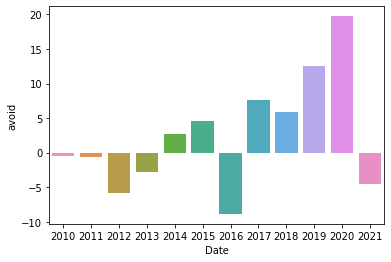

In [ ]:
import seaborn as sns
sns.barplot(data = output, x = output.index.year, y = 'avoid', estimator=np.sum, ci=None)

In [ ]:
pd.Series([-1 if price[price.index.year == y].iloc[-1,0] - price[price.index.year == y].iloc[0,0] < 0 else 1 for y in range(2010,2022)],index=range(2010,2022))

2010    1
2011   -1
2012    1
2013    1
2014    1
2015   -1
2016    1
2017    1
2018   -1
2019   -1
2020   -1
2021    1
dtype: int64

In [ ]:
a = round(100*(price.iloc[-1,0]-price.iloc[0,-1])/price.iloc[0,-1],6)
b = round(100*(price.iloc[-1,-1]-price.iloc[0,-1])/price.iloc[0,-1],6)
print(f'Buy and Hold return: {a}%')
print(f'NLP return: {b}%')
print(f'NLP improved by: {round(100*(b-a)/a,6)}%')

Buy and Hold return: 340.495848%
NLP return: 960.536377%
NLP improved by: 182.099292%


##embeddings

In [ ]:
# # from google.colab import files
# # files.upload() #upload kaggle.json

# # !pip install -q kaggle
# # !mkdir -p ~/.kaggle
# # !cp kaggle.json ~/.kaggle/

# # !ls ~/.kaggle
# # !chmod 600 /root/.kaggle/kaggle.json

# import tensorflow as tf
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense,Input
# from sklearn.utils import shuffle
# import tensorflow_hub as hub
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# import numpy as np
# import os
# import pandas as pd
# DATASET_ENCODING = "ISO-8859-1"

# !kaggle datasets download -d kazanova/sentiment140

# df = pd.read_csv("/content/sentiment140.zip",encoding=DATASET_ENCODING)
# df= df.iloc[:,[0,-1]]
# df.columns = ['sentiment','tweet']
# df = pd.concat([df.query("sentiment==0").sample(20000),df.query("sentiment==4").sample(20000)])
# df.sentiment = df.sentiment.map({0:0,4:1})
# df =  shuffle(df).reset_index(drop=True)

# embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# def vectorize(df):
#     embeded_tweets = embed(df['tweet'].values.tolist()).numpy()
#     targets = df.sentiment.values
#     return embeded_tweets,targets

# embeded_tweets,targets = vectorize(df)

In [ ]:
# model = Sequential()
# model.add(Input(shape=(512,),dtype='float32'))
# model.add(Dense(128, activation = 'relu'))
# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))

# model.compile(loss='binary_crossentropy', 
#               optimizer='adam',
#               metrics=['acc'])

# num_epochs = 3
# batch_size = 8   ## 2^x

# history = model.fit(embeded_tweets, 
#                     targets, 
#                     epochs=num_epochs, 
#                     validation_split=0.1, 
#                     shuffle=True,
#                     batch_size=batch_size,
#                     )

In [ ]:
# %%time
# pred = model.predict(embed(df_new['clean_tweet']).numpy())

## vader

In [ ]:
# sentence = "I love you, but I can't fall in love with you"
# import nltk
# nltk.download('vader_lexicon')
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# sid = SentimentIntensityAnalyzer()
# sid.polarity_scores(sentence)